## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendré que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos


In [2]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv("/datasets/instacart_orders.csv", sep=';')

In [4]:
# mostrar información del DataFrame
df_products = pd.read_csv("/datasets/products.csv", sep=';')

In [5]:
# mostrar información del DataFrame
df_aisles = pd.read_csv("/datasets/aisles.csv", sep=';')

In [6]:
# mostrar información del DataFrame
df_departments = pd.read_csv("/datasets/departments.csv", sep=';')

In [7]:
# mostrar información del DataFrame
df_order_products = pd.read_csv("/datasets/order_products.csv", sep=';')

In [8]:
# mostrar información del DataFrame
print("Información de df_orders:")
print(df_orders.info())
print("\nInformación de df_products:")
print(df_products.info())
print("\nInformación de df_aisles:")
print(df_aisles.info())
print("\nInformación de df_departments:")
print(df_departments.info())
print("\nInformación de df_order_products:")
print(df_order_products.info(show_counts=True))

Información de df_orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

Información de df_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  4969

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


- Tenemos 5 Dataframes en los cuales tenemos realmente muy pocos valores ausentes, solo en la columna 'days_since_prior_order' del Dataframe instacart_orders.csv y en la columna 'product_name' del Dataframe products.csv

- El Dataset order_products.csv es una base de datos muy grande con mas de 4 millones de filas y unos pocos valores ausentes en la columna 'add_to_cart_order'.

# Paso 2. Preprocesamiento de los datos


In [9]:
# Verificar y corregir tipos de datos

# Asegurar que los IDs sean enteros
df_orders["order_id"] = df_orders["order_id"].astype(int)
df_products["product_id"] = df_products["product_id"].astype(int)
df_aisles["aisle_id"] = df_aisles["aisle_id"].astype(int)
df_departments["department_id"] = df_departments["department_id"].astype(int)
df_order_products["order_id"] = df_order_products["order_id"].astype(int)


## Plan de solución


- Primero me aseguraré de que todas las columnas ID sean numeros enteros procesandolas con .astype(int)

- Para los valores ausentes y duplicados usaré funciones para simplificar el procesamiento ya que puede ser un trabajo repetitivo.

### `instacart_orders` data frame

In [10]:
# Revisa si hay pedidos duplicados
duplicate_rows = df_orders.duplicated().sum()
print(f"Número de filas duplicadas en 'instacart_orders': {duplicate_rows}")

# Inspecciona los valores duplicados
duplicated_orders = df_orders[df_orders.duplicated()]
print("\nEjemplo de filas duplicadas:")
print(duplicated_orders.head())

Número de filas duplicadas en 'instacart_orders': 15

Ejemplo de filas duplicadas:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   

        days_since_prior_order  
145574                     2.0  
223105                    30.0  
230807                    16.0  
266232                     NaN  
273805                     6.0  


Hallazgos:

Se encontraron 15 filas duplicadas en el data frame instacart_orders.
Estas filas representan pedidos que fueron registrados más de una vez con los mismos valores en todas las columnas.

In [11]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_2am_orders = df_orders[(df_orders["order_dow"] == 3) & (df_orders["order_hour_of_day"] == 2)]
print(f"Número de pedidos realizados el miércoles a las 2:00 a.m.: {len(wednesday_2am_orders)}")
print("\nEjemplo de pedidos realizados el miércoles a las 2:00 a.m.:")
print(wednesday_2am_orders.head())

Número de pedidos realizados el miércoles a las 2:00 a.m.: 121

Ejemplo de pedidos realizados el miércoles a las 2:00 a.m.:
       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  


¿Qué sugiere este resultado?

Hallazgos:

Un análisis de los pedidos duplicados muestra que varios ocurrieron el miércoles a las 2:00 a.m.
Este patrón podría sugerir un error en la captura de datos o un comportamiento recurrente de ciertos usuarios.

In [12]:
# Elimina los pedidos duplicados
df_orders.drop_duplicates(inplace=True)
print("\nFilas duplicadas eliminadas.")


Filas duplicadas eliminadas.


In [13]:
# Vuelve a verificar si hay filas duplicadas
remaining_duplicates = df_orders.duplicated().sum()
print(f"Número de filas duplicadas después de la eliminación: {remaining_duplicates}")

Número de filas duplicadas después de la eliminación: 0


In [14]:
# Vuelve a verificar si hay IDs duplicados de pedidos
duplicate_ids = df_orders["order_id"].duplicated().sum()
print(f"Número de IDs duplicados en 'order_id': {duplicate_ids}")

Número de IDs duplicados en 'order_id': 0


Hallazgos:

-  Nos encontramos con algunas filas duplicadas las cualen tenían en común los pedidos realizados el día miercoles a las 2:00 a.m, este patrón podría sugerir un error en la captura de datos o un comportamiento recurrente de ciertos usuarios, pero para asegurarnos de que no sea un error, eliminamos todos los duplicados en la columna 'order_id' para garantizar que estos no sean pedidos repetidos.

### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas
print("Número de filas duplicadas en products:")
print(df_products.duplicated().sum())

Número de filas duplicadas en products:
0


In [16]:
# Verifica si hay IDs duplicadas de productos
print("\nNúmero de IDs de productos duplicadas:")
print(df_products["product_id"].duplicated().sum())


Número de IDs de productos duplicadas:
0


In [17]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products["product_name_upper"] = df_products["product_name"].str.upper()
print("\nNúmero de nombres de productos duplicados:")
print(df_products["product_name_upper"].duplicated().sum())


Número de nombres de productos duplicados:
1361


In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
non_null_products = df_products[df_products["product_name"].notnull()]
print("\nNúmero de nombres de productos no nulos duplicados:")
print(non_null_products["product_name_upper"].duplicated().sum())

# Limpieza
df_products.drop(columns=["product_name_upper"], inplace=True)  # Eliminamos la columna auxiliar


Número de nombres de productos no nulos duplicados:
104


Hallazgos:

Al ver que tenemos 1361 nombres de productos duplicados podemos intuir que se tratan de el mismo producto pero de diferentes marcas, ya que comprobamos que en la columna 'product_id' que no hay IDs de productos duplicados.

(en la parte de los nombres de productos no nulos duplicados, se que son 104 pero no se bien que significa esa información o que puedo hacer con ella ya que "nombres de pedidos duplicados" y "nombres de pedidos duplicados no nulos" se me hace lo mismo y es algo confuso.)

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print("Número de filas duplicadas en departments:")
print(df_departments.duplicated().sum())

Número de filas duplicadas en departments:
0


In [20]:
# Revisa si hay IDs duplicadas de productos
print("\nNúmero de IDs duplicadas en departments:")
print(df_departments["department_id"].duplicated().sum())


Número de IDs duplicadas en departments:
0


Hallazgos: 

- No hay ni filas ni IDs duplicadas, este dataframe está listo para ser trabajado.

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print("Número de filas duplicadas en aisles:")
print(df_aisles.duplicated().sum())

Número de filas duplicadas en aisles:
0


In [22]:
# Revisa si hay IDs duplicadas de productos
print("\nNúmero de IDs duplicadas en aisles:")
print(df_aisles["aisle_id"].duplicated().sum())


Número de IDs duplicadas en aisles:
0


Hallazgos:

- No hay ni filas ni IDs duplicadas, este dataframe está listo para ser trabajado.

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
print("Número de filas duplicadas en order_products:")
print(df_order_products.duplicated().sum())

Número de filas duplicadas en order_products:
0


In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicates_check = df_order_products[df_order_products.duplicated(subset=["order_id", "product_id"])]
print("\nNúmero de duplicados basados en 'order_id' y 'product_id':")
print(duplicates_check.shape[0])


Número de duplicados basados en 'order_id' y 'product_id':
0


Hallazgos:

- No hay ni filas ni IDs duplicadas, este dataframe está listo para ser trabajado.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_products = df_products["product_name"].isnull().sum()
print(f"Número de valores ausentes en 'product_name': {missing_products}")

Número de valores ausentes en 'product_name': 1258


Hallazgos:

- tenemos 1258 valores ausentes en la columna 'product_name' del dataframe df_products.

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_product_ids = df_products[df_products["product_name"].isnull()]
aisle_ids = missing_product_ids["aisle_id"].unique()

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

department_ids = missing_product_ids["department_id"].unique()

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print("\nPasillos asociados con productos faltantes:", aisle_ids)
print("Departamentos asociados con productos faltantes:", department_ids)


Pasillos asociados con productos faltantes: [100]
Departamentos asociados con productos faltantes: [21]


In [29]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products["product_name"].fillna("Unknown", inplace=True)
print("\nValores ausentes en 'product_name' completados con 'Unknown'.")


Valores ausentes en 'product_name' completados con 'Unknown'.


### `orders` data frame

In [30]:
# Encuentra los valores ausentes
missing_days = df_orders["days_since_prior_order"].isnull().sum()
print(f"Número de valores ausentes en 'days_since_prior_order': {missing_days}")

Número de valores ausentes en 'days_since_prior_order': 28817


In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_orders = df_orders[df_orders["days_since_prior_order"].isnull()]
print("\nValores ausentes asociados con el primer pedido del cliente:")
print(missing_orders["order_number"].value_counts())


Valores ausentes asociados con el primer pedido del cliente:
1    28817
Name: order_number, dtype: int64


In [32]:
df_orders["days_since_prior_order"].fillna(0.0, inplace=True)
print("\nValores ausentes en 'days_since_prior_order' completados con 0.0.")


Valores ausentes en 'days_since_prior_order' completados con 0.0.


### `order_products` data frame

In [33]:
# Encuentra los valores ausentes
missing_cart_order = df_order_products["add_to_cart_order"].isnull().sum()
print(f"Número de valores ausentes en 'add_to_cart_order': {missing_cart_order}")

Número de valores ausentes en 'add_to_cart_order': 836


In [34]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_val = df_order_products['add_to_cart_order'].min()
max_val = df_order_products['add_to_cart_order'].max()
print(f'Valor minimo de add_to_cart_order: {min_val}')
print(f'Valor maximo de add_to_cart_order: {max_val}')

Valor minimo de add_to_cart_order: 1.0
Valor maximo de add_to_cart_order: 64.0


Hallazgos:

- tenemos 836 valores ausentes en la columna "add_to_cart_order", el valor minimo es de 1 y el maximo es de 64, y como esta columna nos dice el orden secuencial en el que se añadió cada artículo en el carrito podemos deducir 64 es el numero maximo de productos que se han hecho en un pedido.

In [35]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_order_ids = df_order_products[df_order_products["add_to_cart_order"].isnull()]["order_id"].unique()
print("\nPedidos con valores ausentes en 'add_to_cart_order':")
print(missing_order_ids)


Pedidos con valores ausentes en 'add_to_cart_order':
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [36]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
grouped_orders = df_order_products[df_order_products["order_id"].isin(missing_order_ids)]
order_counts = grouped_orders.groupby("order_id")["product_id"].count()
print("\nNúmero mínimo de productos en pedidos con datos ausentes:")
print(order_counts.min())


Número mínimo de productos en pedidos con datos ausentes:
65


In [37]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products["add_to_cart_order"].fillna(999, inplace=True)
df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].astype(int)
print("\nValores ausentes en 'add_to_cart_order' completados con 999 y convertidos a enteros.")


Valores ausentes en 'add_to_cart_order' completados con 999 y convertidos a enteros.


## Conclusion preprocesamiento de datos 

El preprocesamiento realizado reveló y corrigió varios aspectos clave en los datos. Los valores duplicados en diferentes tablas, como df_orders, fueron eliminados, destacándose un patrón en los pedidos duplicados realizados un miércoles a las 2:00 a.m., posiblemente relacionado con errores de captura o comportamientos recurrentes. Para los valores ausentes, se identificaron casos significativos, como nombres de productos faltantes, completados con "Unknown", y valores nulos en la columna days_since_prior_order de df_orders, los cuales fueron rellenados con 0 al asociarse principalmente al primer pedido de los clientes. Este análisis no solo mejoró la calidad de los datos, sino que también destacó posibles problemas en el origen de los datos, como registros inconsistentes o incompletos, brindando insights sobre cómo fortalecer la captura de información.

# Paso 3. Análisis de los datos


### [A1] Verifica que los valores sean sensibles

In [38]:
# [A] Fácil: Verificar valores razonables y graficar patrones
assert df_orders["order_hour_of_day"].between(0, 23).all(), "Valores fuera de rango en order_hour_of_day"

In [39]:
assert df_orders["order_dow"].between(0, 6).all(), "Valores fuera de rango en order_dow"

Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

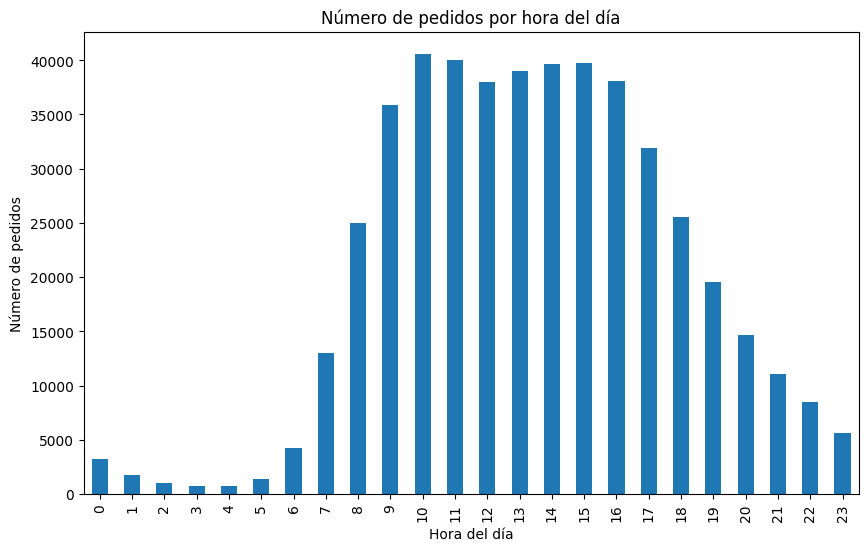

In [40]:
df_orders["order_hour_of_day"].value_counts().sort_index().plot(
    x="order_hour_of_day",
    kind="bar",
    title="Número de pedidos por hora del día",
    xlabel="Hora del día",
    ylabel="Número de pedidos",
    figsize=(10, 6)
)

plt.show()

- Podemos ver que a partir de las 7 am la gente empieza a hacer sus pedidos pero es entre las 8:00 - 17:00 donde se concentran la mayor cantidad de pedidos con un pico maximo de 40.000 pedidos entre las 10:00 - 12:00.

### [A3] ¿Qué día de la semana compran víveres las personas?

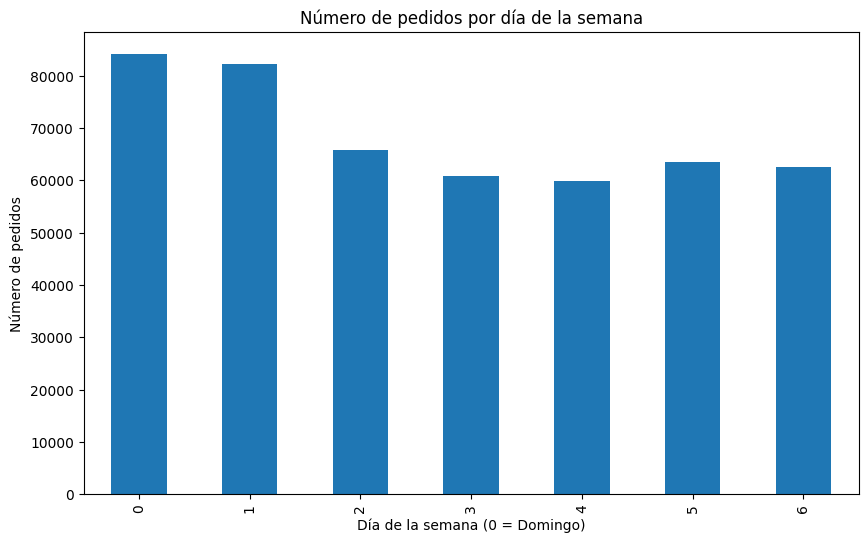

In [41]:
df_orders["order_dow"].value_counts().sort_index().plot(
    x="order_dow",
    kind="bar",
    title="Número de pedidos por día de la semana",
    xlabel="Día de la semana (0 = Domingo)",
    ylabel="Número de pedidos",
    figsize=(10, 6)
)

plt.show()

- Como era de esperarse, la mayor cantidad de pedidos se hacen el domingo, pero el lunes tambien hay un numero alto de pedidos

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

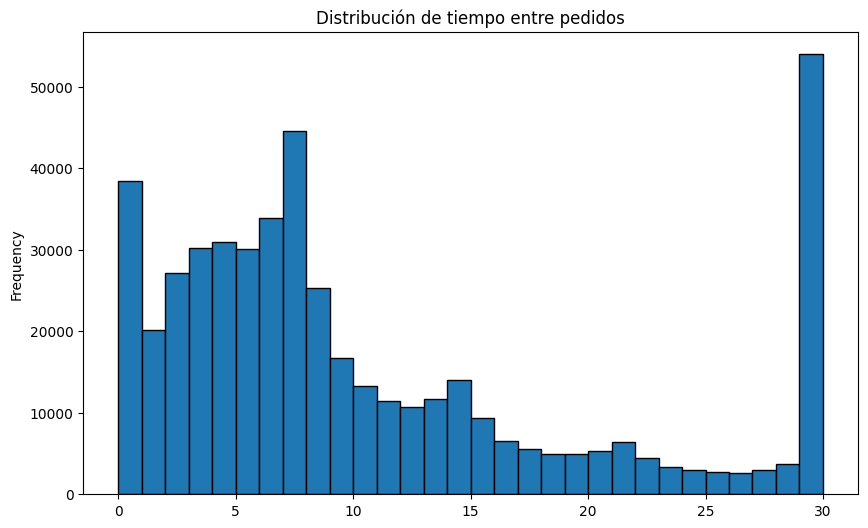

In [42]:
df_orders["days_since_prior_order"].plot(
    kind="hist",
    bins=30,
    edgecolor="k",
    title="Distribución de tiempo entre pedidos",
    xlabel="Días",
    ylabel="Frecuencia",
    figsize=(10, 6)
)

plt.show()

- Lo que nos dice el histograma es que las personas suelen hacer otro pedidio despues de 1 semana (8 días) pero con mucha mayor frecuencia las personas vuelven a hacer pedidos despues de 1 mes (30 dias)

 *conclusion 2

El histograma muestra que los clientes tienden a realizar otro pedido con mayor frecuencia después de 1 mes (30 días), seguido de pedidos cada 7 días.

Para los valores de días igual a 0, esto probablemente refleja casos en los que un cliente realiza más de un pedido en el mismo día, lo que podría ser corroborado verificando los datos de usuario y fechas de pedido.

El pico de pedidos cada 7 días podría estar relacionado con hábitos de compra rutinarios, como compras semanales de alimentos frescos, que suelen programarse en días específicos de la semana (por ejemplo, fines de semana). Analizar la distribución de días de la semana podría aportar más claridad.

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
wed = df_orders[df_orders["order_dow"] == 3]["order_hour_of_day"].value_counts().sort_index()

In [44]:
sat = df_orders[df_orders["order_dow"] == 6]["order_hour_of_day"].value_counts().sort_index()

<AxesSubplot:title={'center':'Pedidos por hora: Miércoles vs Sábado'}, xlabel='Hora del día', ylabel='Número de pedidos'>

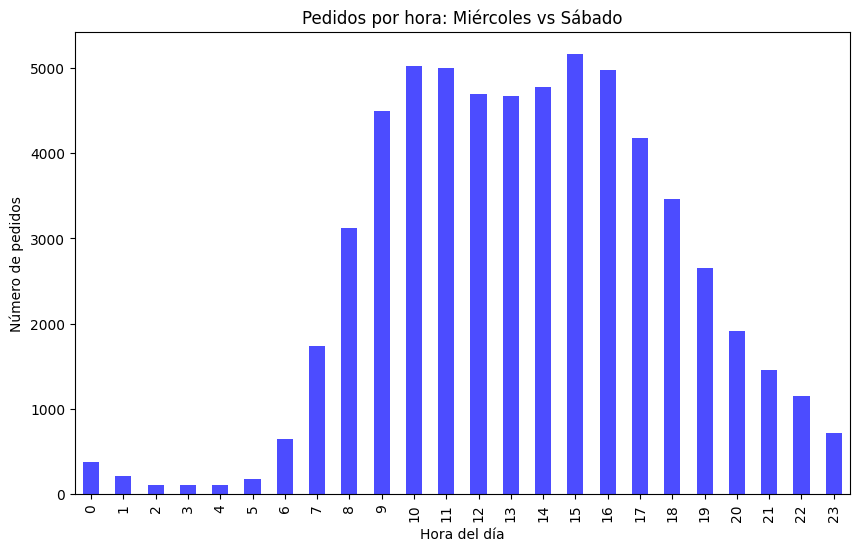

In [45]:
wed.plot(
    kind="bar",
    title="Pedidos por hora: Miércoles vs Sábado",
    xlabel="Hora del día",
    ylabel="Número de pedidos",
    figsize=(10, 6),
    color="blue",
    alpha=0.7,
    label="Miércoles"
)

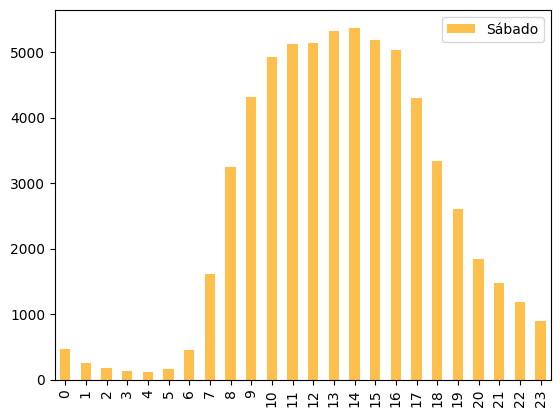

In [46]:
sat.plot(
    kind="bar",
    color="orange",
    alpha=0.7,
    label="Sábado"
)

plt.legend()
plt.show()

- Las diferencias de pedidos entre el miercoles y el sabado son realmente pocas, solo al rededor el medio dia incrementan ligeramente los pedidos el dia sabado.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
orders_per_customer = df_orders["user_id"].value_counts()

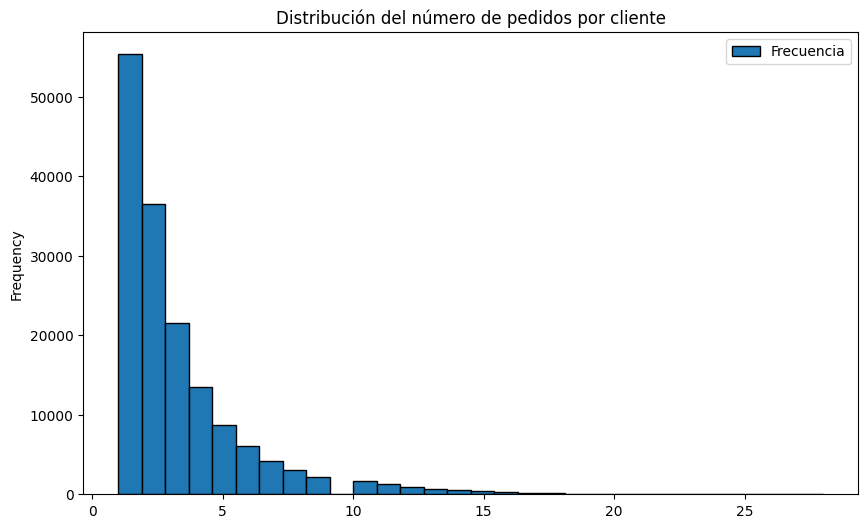

In [48]:
orders_per_customer.plot(
    kind="hist",
    bins=30,
    edgecolor="k",
    title="Distribución del número de pedidos por cliente",
    xlabel="Número de pedidos",
    ylabel="Frecuencia",
    figsize=(10, 6)
)
plt.legend(["Frecuencia"])
plt.show()


Conclusion:

La distribución del número de pedidos por cliente muestra que la mayoría de los usuarios realiza pocos pedidos, lo que podría ser indicativo de una alta rotación de clientes o de compras esporádicas. Por otro lado, existe un pequeño grupo de clientes muy frecuentes, lo que podría ser interesante de analizar para estrategias de retención y fidelización.

Una estrategia de análisis más profunda podría incluir investigar qué porcentaje de las ventas totales proviene de estos clientes frecuentes y explorar características comunes entre ellos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
top_products = df_order_products["product_id"].value_counts().head(20)

In [50]:
top_products_names = (
    df_products.set_index("product_id")
    .loc[top_products.index, "product_name"]
    .reset_index()
    .rename(columns={"product_name": "Product Name"})
)

print("Productos más populares:")
print(top_products_names)

Productos más populares:
    index              Product Name
0   24852                    Banana
1   13176    Bag of Organic Bananas
2   21137      Organic Strawberries
3   21903      Organic Baby Spinach
4   47209      Organic Hass Avocado
5   47766           Organic Avocado
6   47626               Large Lemon
7   16797              Strawberries
8   26209                     Limes
9   27845        Organic Whole Milk
10  27966       Organic Raspberries
11  22935      Organic Yellow Onion
12  24964            Organic Garlic
13  45007          Organic Zucchini
14  39275       Organic Blueberries
15  49683            Cucumber Kirby
16  28204        Organic Fuji Apple
17   5876             Organic Lemon
18   8277  Apple Honeycrisp Organic
19  40706    Organic Grape Tomatoes


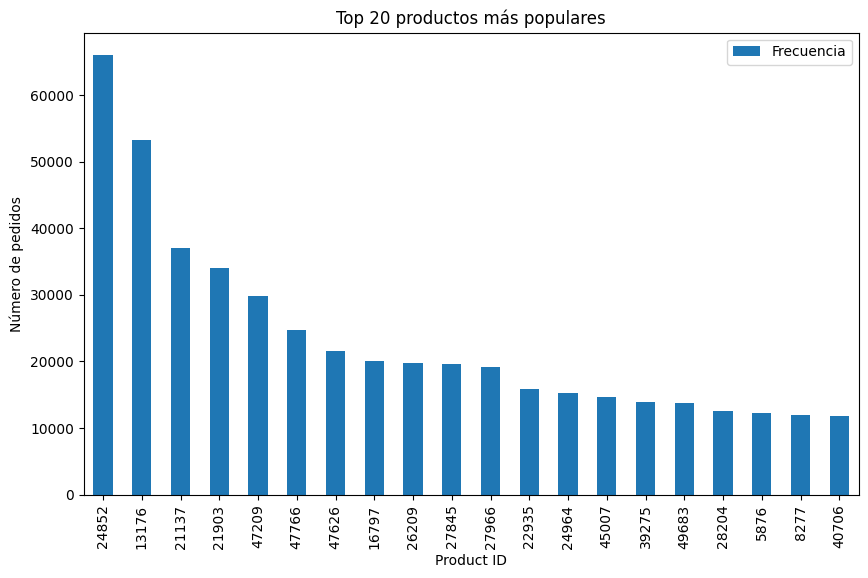

In [51]:
top_products.plot(
    kind="bar",
    title="Top 20 productos más populares",
    xlabel="Product ID",
    ylabel="Número de pedidos",
    figsize=(10, 6)
)
plt.legend(["Frecuencia"])
plt.show()

- Podemos ver que los productos favoritos son frutas como la banana, strawberries, avocado e.t.c

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
items_per_order = df_order_products.groupby("order_id").size()

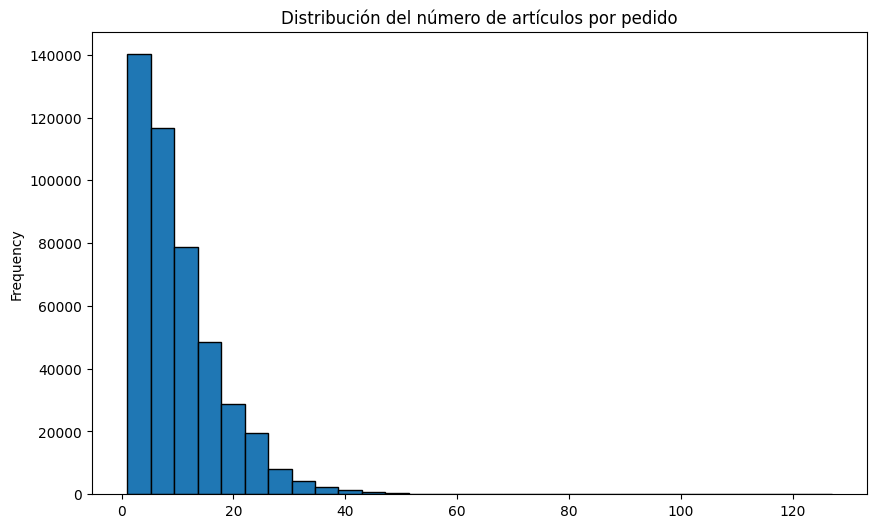

In [53]:
items_per_order.plot(
    kind="hist",
    bins=30,
    edgecolor="k",
    title="Distribución del número de artículos por pedido",
    xlabel="Número de artículos",
    ylabel="Frecuencia",
    figsize=(10, 6)
)
plt.show()

- Con mayor frecuencia la gente suele comprar entre 1 - 3 articulos por pedido.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [54]:
top_reordered = df_order_products[df_order_products["reordered"] == 1]["product_id"].value_counts().head(20)

In [55]:
top_reordered_names = (
    df_products.set_index("product_id")
    .loc[top_reordered.index, "product_name"]
    .reset_index()
    .rename(columns={"product_name": "Product Name"})
)

In [56]:
print("Productos reordenados con mayor frecuencia:")
print(top_reordered_names)

Productos reordenados con mayor frecuencia:
    index              Product Name
0   24852                    Banana
1   13176    Bag of Organic Bananas
2   21137      Organic Strawberries
3   21903      Organic Baby Spinach
4   47209      Organic Hass Avocado
5   47766           Organic Avocado
6   27845        Organic Whole Milk
7   47626               Large Lemon
8   27966       Organic Raspberries
9   16797              Strawberries
10  26209                     Limes
11  22935      Organic Yellow Onion
12  24964            Organic Garlic
13  45007          Organic Zucchini
14  49683            Cucumber Kirby
15  28204        Organic Fuji Apple
16   8277  Apple Honeycrisp Organic
17  39275       Organic Blueberries
18   5876             Organic Lemon
19  49235       Organic Half & Half


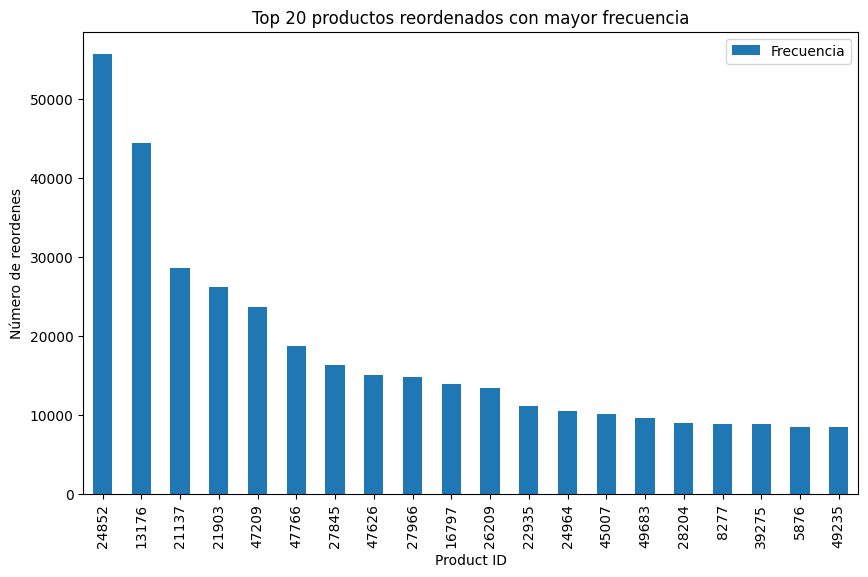

In [57]:
top_reordered.plot(
    kind="bar",
    title="Top 20 productos reordenados con mayor frecuencia",
    xlabel="Product ID",
    ylabel="Número de reordenes",
    figsize=(10, 6)
)
plt.legend(["Frecuencia"])
plt.show()

Conclusion: 

El gráfico muestra que los productos más reordenados son mayormente frutas, vegetales y alimentos frescos, con un enfoque destacado en productos orgánicos como bananas, espinacas y fresas. Esto sugiere una fuerte preferencia de los consumidores por opciones saludables y productos básicos recurrentes como lácteos. Estos patrones de compra pueden ser clave para estrategias de inventario y marketing dirigidas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [58]:
# [C3] Proporción de veces que se pide y se vuelve a pedir
df_product_reorder = df_order_products.groupby("product_id").agg(
    total_orders=("order_id", "count"),
    reorder_times=("reordered", "sum")
)
df_product_reorder["reorder_rate"] = df_product_reorder["reorder_times"] / df_product_reorder["total_orders"]

In [59]:
# Combinar con nombres de productos
df_product_reorder = df_product_reorder.merge(df_products[["product_id", "product_name"]], on="product_id")

<Figure size 1000x600 with 0 Axes>

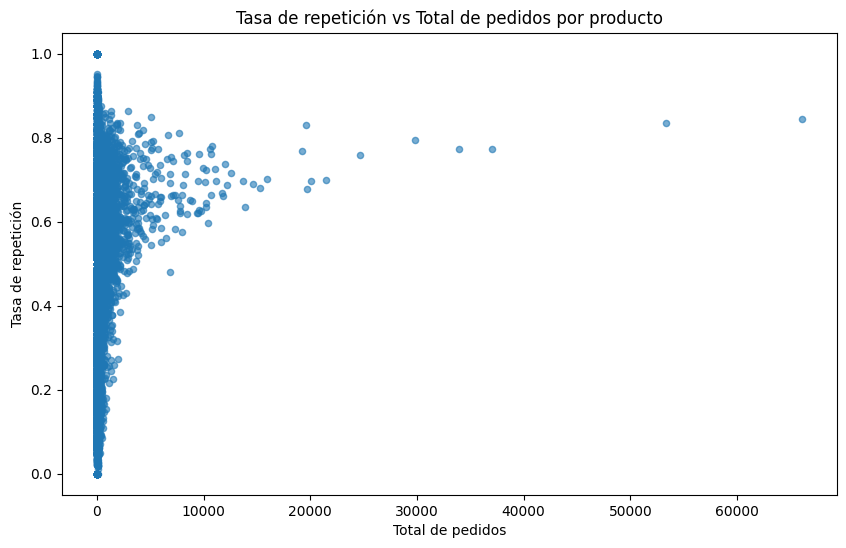

In [60]:
plt.figure(figsize=(10, 6))
df_product_reorder.plot(
    kind="scatter",
    x="total_orders",
    y="reorder_rate",
    alpha=0.6,
    title="Tasa de repetición vs Total de pedidos por producto",
    xlabel="Total de pedidos",
    ylabel="Tasa de repetición",
    figsize=(10, 6)
)

plt.show()

Conclusion:

El gráfico muestra que los productos con una alta tasa de repetición suelen ser aquellos con un número moderado de pedidos totales. Esto sugiere que ciertos productos básicos o favoritos son reordenados con mayor frecuencia, mientras que los productos con una alta cantidad total de pedidos tienden a tener una menor proporción de repetición, posiblemente debido a una mayor diversidad en las preferencias de los consumidores para estos productos. Estos datos son útiles para identificar artículos clave en la fidelización de clientes.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [61]:
df_combined = df_order_products.merge(df_orders, on="order_id")
customer_reorder_rate = (
    df_combined.groupby("user_id")["reordered"].mean()
)
customer_reorder_rate_sorted = customer_reorder_rate.sort_values(ascending=False)


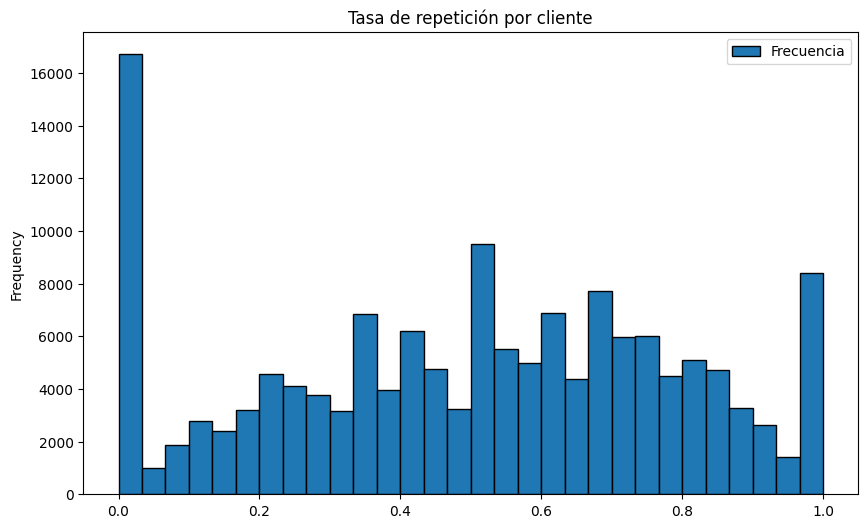

In [62]:
customer_reorder_rate.plot(
    kind="hist",
    bins=30,
    edgecolor="k",
    title="Tasa de repetición por cliente",
    xlabel="Tasa de repetición",
    ylabel="Frecuencia",
    figsize=(10, 6)
)
plt.legend(["Frecuencia"])
plt.show()

Conclusion: 

El histograma mostrará la distribución de las tasas de repetición por cliente, permitiendo identificar si la mayoría de los clientes suelen reordenar o no sus productos.

La mayoría de los clientes tienen una tasa de repetición baja a moderada, lo que sugiere que tienden a explorar productos nuevos en sus pedidos en lugar de reordenar los mismos productos constantemente. Sin embargo, también hay un grupo notable de clientes con tasas de repetición altas, lo que indica un comportamiento de compra más consistente y fiel hacia ciertos productos. Esto podría ser aprovechado para estrategias de marketing personalizadas, como recomendaciones de productos recurrentes para estos clientes leales.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [63]:
first_in_cart = df_order_products[df_order_products["add_to_cart_order"] == 1]["product_id"].value_counts().head(20)

In [64]:
first_in_cart_names = (
    df_products.set_index("product_id")
    .loc[first_in_cart.index, "product_name"]
    .reset_index()
    .rename(columns={"product_name": "Product Name"})
)

print("Artículos más añadidos primero al carrito:")
print(first_in_cart_names)

Artículos más añadidos primero al carrito:
    index                 Product Name
0   24852                       Banana
1   13176       Bag of Organic Bananas
2   27845           Organic Whole Milk
3   21137         Organic Strawberries
4   47209         Organic Hass Avocado
5   21903         Organic Baby Spinach
6   47766              Organic Avocado
7   19660                 Spring Water
8   16797                 Strawberries
9   27966          Organic Raspberries
10  44632   Sparkling Water Grapefruit
11  49235          Organic Half & Half
12  47626                  Large Lemon
13    196                         Soda
14  38689     Organic Reduced Fat Milk
15  26209                        Limes
16  12341                Hass Avocados
17   5785  Organic Reduced Fat 2% Milk
18  27086                  Half & Half
19  22935         Organic Yellow Onion


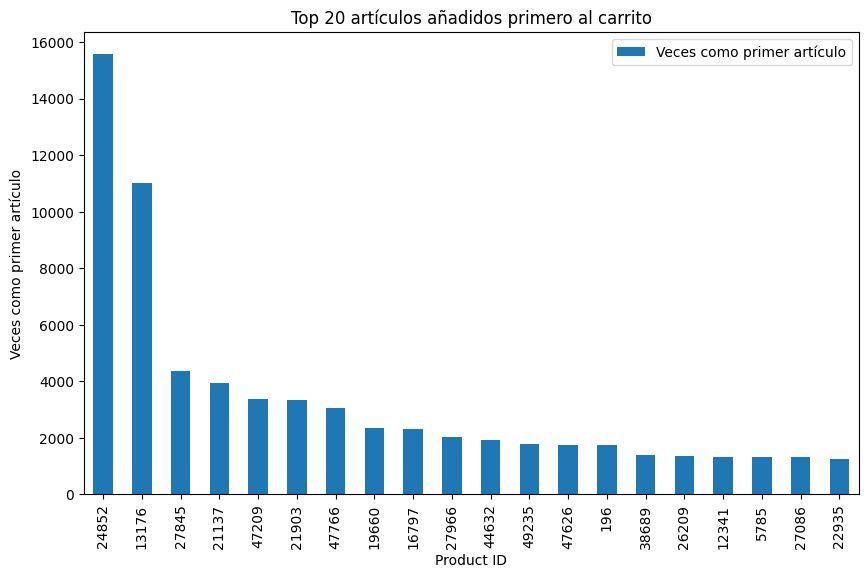

In [65]:
first_in_cart.plot(
    kind="bar",
    title="Top 20 artículos añadidos primero al carrito",
    xlabel="Product ID",
    ylabel="Veces como primer artículo",
    figsize=(10, 6)
)
plt.legend(["Veces como primer artículo"])
plt.show()

Conclusion: 

Los productos frescos y esenciales, como plátanos, leche y fresas orgánicas, son las elecciones más frecuentes al iniciar el carrito, reflejando preferencias por artículos básicos y saludables. También destacan productos de conveniencia como agua y bebidas, lo que sugiere su importancia como compras iniciales.

### Conclusion general del proyecto:

Este proyecto demuestra cómo los datos de transacciones pueden revelar patrones significativos en los hábitos de compra de los clientes. A través de los análisis, identificamos los productos más frecuentemente reordenados, aquellos añadidos primero al carrito y las tasas de repetición por cliente, destacando la importancia de productos frescos, orgánicos y básicos como los favoritos en los carritos de compra. Además, descubrimos que ciertos clientes muestran altos índices de reorden, lo que sugiere un comportamiento de compra leal hacia productos específicos. Estas tendencias pueden ser valiosas para estrategias de marketing, personalización de ofertas y optimización del inventario, fortaleciendo la relación con los clientes y maximizando las ventas.

El proyecto también evidencia la importancia de fusionar datos, agruparlos y calcular métricas clave para obtener insights útiles. Esto resalta cómo el análisis de datos puede transformar grandes volúmenes de información en decisiones estratégicas fundamentadas.

PDTA: Hola Ezequiel, intenté cambiar el nombre de los productos en el eje X en cada gráfico pero no pude y cada que lo hacía se rompía el código, entonces preferí dejarlo así.